# 변동성 타겟팅

## Import Modules

In [2]:
import pandas as pd
from tqdm import tqdm
import requests

## KODEX 200

In [4]:
kodex_200 = pd.DataFrame()
kodex_code = '069500'
url = 'https://finance.naver.com/item/sise_day.naver?code=' + kodex_code

for page in tqdm(range(1, 221)):
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    kodex_200 = kodex_200.append(pd.read_html(requests.get(pg_url, headers={'User-agent':'Mozilla/5.0'}).text)[0], ignore_index=True)
    
kodex_200 = kodex_200.dropna()
kodex_200.columns = ['date', 'close', 'over_the_day', 'start', 'high', 'low', 'volumes']
kodex_200.date = pd.to_datetime(kodex_200.date)

print('출처:', url)
kodex_200.head()

100%|██████████| 220/220 [00:23<00:00,  9.18it/s]

출처: https://finance.naver.com/item/sise_day.naver?code=069500


,date,close,over_the_day,start,high,low,volumes
1,2022-03-02,36455.0,150.0,36625.0,36720.0,36415.0,3780472.0
2,2022-02-28,36605.0,275.0,36095.0,36605.0,36010.0,6546067.0
3,2022-02-25,36330.0,405.0,36260.0,36530.0,36150.0,8181295.0
4,2022-02-24,35925.0,965.0,36440.0,36500.0,35815.0,10463997.0
5,2022-02-23,36890.0,130.0,37020.0,37100.0,36695.0,4660928.0


In [5]:
kodex_200.tail()

,date,close,over_the_day,start,high,low,volumes
3294,2013-03-27,26425.0,185.0,26380.0,26500.0,26065.0,5578990.0
3295,2013-03-26,26240.0,65.0,26200.0,26350.0,26135.0,5824009.0
3296,2013-03-25,26175.0,440.0,25965.0,26275.0,25950.0,7590012.0
3297,2013-03-22,25735.0,55.0,25795.0,25835.0,25715.0,14002949.0
3298,2013-03-21,25790.0,175.0,26065.0,26085.0,25780.0,13329741.0


## Calculate Volatility(monthly)

In [8]:
kodex_200[(kodex_200.date.dt.year == 2020) & (kodex_200.date.dt.month == 1)].close.std()

657.0326035329321

In [9]:
import numpy as np
# pandas 결과랑 numpy 결과가 다름 사용하는 표준편차 공식이 다름
np.std(kodex_200[(kodex_200.date.dt.year == 2020) & (kodex_200.date.dt.month == 1)].close)

640.3961664469892

In [20]:
kodex_monthly = pd.DataFrame()

for i in range(2011, 2021):
    for j in range(1, 13):
        kodex_monthly = kodex_monthly.append(kodex_200[(kodex_200.date.dt.year == i) & (kodex_200.date.dt.month == j)].head(1))
        
kodex_index = [x for x in range(len(kodex_monthly))]
kodex_monthly.index = kodex_index
kodex_monthly = kodex_monthly.sort_values(by='date')
kodex_monthly.head()

,date,close,over_the_day,start,high,low,volumes
0,2013-03-29,26560.0,105.0,26555.0,26735.0,26555.0,5883450.0
1,2013-04-30,25590.0,325.0,25400.0,25660.0,25330.0,7634746.0
2,2013-05-31,26135.0,20.0,26170.0,26310.0,26135.0,5311660.0
3,2013-06-28,24170.0,315.0,23920.0,24310.0,23920.0,7207577.0
4,2013-07-31,24775.0,60.0,24800.0,24870.0,24720.0,5063766.0


In [21]:
kodex_monthly.tail()

,date,close,over_the_day,start,high,low,volumes
89,2020-08-31,30745.0,505.0,31480.0,31615.0,30745.0,8711694.0
90,2020-09-29,31085.0,290.0,31105.0,31195.0,30940.0,11352046.0
91,2020-10-30,30140.0,840.0,30860.0,30875.0,30140.0,19945840.0
92,2020-11-30,34685.0,535.0,35330.0,35470.0,34685.0,15007819.0
93,2020-12-30,39500.0,815.0,38520.0,39590.0,38440.0,12736997.0


In [22]:
std_list = []

for i in range(2011, 2021):
    for j in range(1, 13): 
        # 절대 표준편차
        abs_std = kodex_200[(kodex_200.date.dt.year == i) & (kodex_200.date.dt.month == j)].close.std()
        # 월평균
        monthly_mean = kodex_200[(kodex_200.date.dt.year == i) & (kodex_200.date.dt.month == j)].close.mean()
        # 상대 표준편차
        rel_std = abs_std / monthly_mean * 100
        
        if rel_std > 0:
            std_list.append(rel_std)
        

In [23]:
len(std_list)

94

In [24]:
len(kodex_monthly)

94

In [25]:
kodex_monthly['std(%)'] = std_list

## Rate of Returns

In [29]:
ror_list = []
for i in range(len(kodex_monthly)):
    try:
        ror = kodex_monthly.close.diff().iloc[i] / kodex_monthly.iloc[i-1].close * 100
    except:
        ror = 0
    
    ror_list.append(ror)

In [30]:
ror_list

[nan,
 -3.65210843373494,
 2.1297381789761625,
 -7.51865314712072,
 2.5031030202730657,
 1.2108980827447022,
 3.988035892323031,
 2.3969319271332696,
 0.8988764044943821,
 -1.0393466963622866,
 -4.238559639909977,
 1.7822169996083042,
 0.01924187030979411,
 -1.8276260100038477,
 1.9008426415833823,
 0.0,
 3.807692307692308,
 -1.8895887365690995,
 -3.266616314199396,
 -2.518055826664064,
 1.261513816579896,
 -2.432272098081867,
 2.776651803810296,
 0.23663971603234074,
 2.0066889632107023,
 2.796528447444552,
 -2.25140712945591,
 -3.435700575815739,
 -3.3790498906777975,
 -4.710964822053076,
 2.072538860103627,
 6.070219966159052,
 -2.333000997008973,
 -0.5920783993466721,
 -3.3682481002259195,
 1.7215727948990436,
 4.28332636857501,
 -2.0236425566018834,
 -0.6134969325153374,
 0.411522633744856,
 2.930327868852459,
 1.8713915986462275,
 0.3126832128200117,
 -0.5260081823495032,
 -0.4700352526439483,
 3.600944510035419,
 3.4757834757834756,
 0.4588839941262849,
 4.293805956513795,
 0.71

In [31]:
kodex_monthly['RoR'] = ror_list

In [33]:
kodex_monthly = kodex_monthly.fillna(0)
kodex_monthly

,date,close,over_the_day,start,high,low,volumes,std(%),RoR
0,2013-03-29,26560.0,105.0,26555.0,26735.0,26555.0,5883450.0,1.238627,0.000000
1,2013-04-30,25590.0,325.0,25400.0,25660.0,25330.0,7634746.0,1.464152,-3.652108
2,2013-05-31,26135.0,20.0,26170.0,26310.0,26135.0,5311660.0,1.025504,2.129738
3,2013-06-28,24170.0,315.0,23920.0,24310.0,23920.0,7207577.0,3.534041,-7.518653
4,2013-07-31,24775.0,60.0,24800.0,24870.0,24720.0,5063766.0,1.693190,2.503103
...,...,...,...,...,...,...,...,...,...
89,2020-08-31,30745.0,505.0,31480.0,31615.0,30745.0,8711694.0,2.136192,2.723020
90,2020-09-29,31085.0,290.0,31105.0,31195.0,30940.0,11352046.0,1.762922,1.105871
91,2020-10-30,30140.0,840.0,30860.0,30875.0,30140.0,19945840.0,1.281571,-3.040051
92,2020-11-30,34685.0,535.0,35330.0,35470.0,34685.0,15007819.0,4.110801,15.079628


In [34]:
kodex_monthly['plus'] = kodex_monthly['RoR'] > 0
kodex_monthly

,date,close,over_the_day,start,high,low,volumes,std(%),RoR,plus
0,2013-03-29,26560.0,105.0,26555.0,26735.0,26555.0,5883450.0,1.238627,0.000000,False
1,2013-04-30,25590.0,325.0,25400.0,25660.0,25330.0,7634746.0,1.464152,-3.652108,False
2,2013-05-31,26135.0,20.0,26170.0,26310.0,26135.0,5311660.0,1.025504,2.129738,True
3,2013-06-28,24170.0,315.0,23920.0,24310.0,23920.0,7207577.0,3.534041,-7.518653,False
4,2013-07-31,24775.0,60.0,24800.0,24870.0,24720.0,5063766.0,1.693190,2.503103,True
...,...,...,...,...,...,...,...,...,...,...
89,2020-08-31,30745.0,505.0,31480.0,31615.0,30745.0,8711694.0,2.136192,2.723020,True
90,2020-09-29,31085.0,290.0,31105.0,31195.0,30940.0,11352046.0,1.762922,1.105871,True
91,2020-10-30,30140.0,840.0,30860.0,30875.0,30140.0,19945840.0,1.281571,-3.040051,False
92,2020-11-30,34685.0,535.0,35330.0,35470.0,34685.0,15007819.0,4.110801,15.079628,True


In [40]:
kodex_monthly['momentum_score'] = kodex_monthly.plus.rolling(window=12).sum()
kodex_monthly = kodex_monthly.dropna()
kodex_monthly.index = [x for x in range(len(kodex_monthly))]

C:\Users\User\AppData\Local\Temp/ipykernel_21108/3108590551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kodex_monthly['momentum_score'] = kodex_monthly.plus.rolling(window=12).sum()


In [41]:
kodex_monthly

,date,close,over_the_day,start,high,low,volumes,std(%),RoR,plus,momentum_score
0,2015-01-30,25355.0,10.0,25445.0,25500.0,25325.0,8656579.0,1.439705,2.776652,True,6.0
1,2015-02-27,25415.0,85.0,25455.0,25500.0,25350.0,7432229.0,0.550266,0.236640,True,6.0
2,2015-03-31,25925.0,10.0,26050.0,26065.0,25875.0,6893954.0,1.043068,2.006689,True,6.0
3,2015-04-30,26650.0,120.0,26685.0,26720.0,26555.0,7481911.0,2.105223,2.796528,True,7.0
4,2015-05-29,26050.0,135.0,25850.0,26150.0,25810.0,5489352.0,0.815676,-2.251407,False,6.0
...,...,...,...,...,...,...,...,...,...,...,...
67,2020-08-31,30745.0,505.0,31480.0,31615.0,30745.0,8711694.0,2.136192,2.723020,True,9.0
68,2020-09-29,31085.0,290.0,31105.0,31195.0,30940.0,11352046.0,1.762922,1.105871,True,9.0
69,2020-10-30,30140.0,840.0,30860.0,30875.0,30140.0,19945840.0,1.281571,-3.040051,False,8.0
70,2020-11-30,34685.0,535.0,35330.0,35470.0,34685.0,15007819.0,4.110801,15.079628,True,8.0


# Backtesting

In [42]:
def backtest(beginning_asset = 100000, target_vol=1):
    asset = []
    
    for i in range(len(kodex_monthly)-1):
        stock_pct = (target_vol / kodex_monthly.iloc[i]['std(%)']) * (kodex_monthly.iloc[i].momentum_score / 12)
        if stock_pct > 1:
            stock_pct = 1
            
        cash_pct = 1 - stock_pct
        
        stock_shares = (beginning_asset * stock_pct) / kodex_monthly.iloc[i].close
        stock_ending_value = stock_shares * kodex_monthly.iloc[i+1].close
        
        cash_ending_value = beginning_asset * cash_pct
        
        total_ending_value = stock_ending_value + cash_ending_value
        asset.append(total_ending_value)
        beginning_asset = total_ending_value
        
    asset.insert(0, 100000)
    return asset


In [44]:
result1 = backtest()
result2 = backtest(target_vol=2)
result3 = backtest(target_vol=3)
result4 = backtest(target_vol=4)

In [45]:
back_test = {
    'date': kodex_monthly.date,
    'backtest1': result1,
    'backtest2': result2,
    'backtest3': result3,
    'backtest4': result4,
    'kodex_200': kodex_monthly.close / kodex_monthly.iloc[0].close
}

back_test = pd.DataFrame(back_test)

In [46]:
back_test

,date,backtest1,backtest2,backtest3,backtest4,kodex_200
0,2015-01-30,100000.000000,100000.000000,100000.000000,100000.000000,1.000000
1,2015-02-27,100082.183383,100164.366767,100236.639716,100236.639716,1.002366
2,2015-03-31,101907.062742,102174.354060,102248.077302,102248.077302,1.022481
3,2015-04-30,103273.158096,104913.711012,105107.473871,105107.473871,1.051075
4,2015-05-29,102628.899561,103604.725115,103140.368718,102741.076711,1.027411
...,...,...,...,...,...,...
67,2020-08-31,105018.483730,108227.870196,113907.431794,115562.476647,1.212581
68,2020-09-29,105426.231091,109068.286604,115167.100905,116840.448416,1.225991
69,2020-10-30,104062.722735,106247.062349,111665.961759,113288.438645,1.188720
70,2020-11-30,112225.761261,122268.724538,128504.773842,130371.914213,1.367975


# Visualization

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

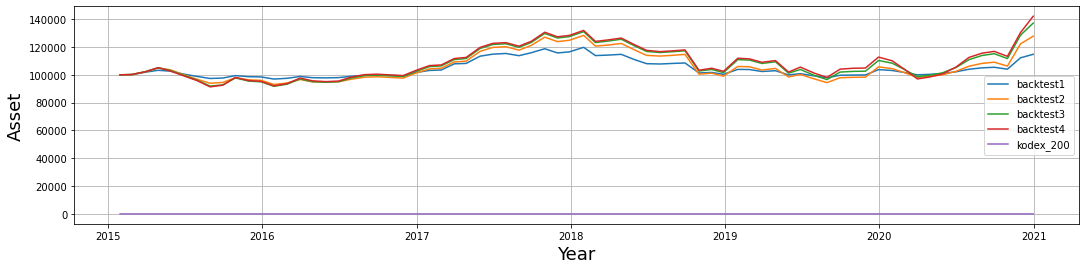

In [49]:
plt.figure(figsize=(18, 4))
plt.plot(back_test.date, back_test.backtest1, label='backtest1')
plt.plot(back_test.date, back_test.backtest2, label='backtest2')
plt.plot(back_test.date, back_test.backtest3, label='backtest3')
plt.plot(back_test.date, back_test.backtest4, label='backtest4')
plt.plot(back_test.date, back_test.kodex_200, label='kodex_200')

plt.grid()
plt.legend(loc='best')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Asset', fontsize=18)
plt.show()